In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import cv2
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
def catImageShow(imageTitle, image):
    imageVariable = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #cvtColor(src, code[, dst[, dstCn]])
    plt.figure(figsize=(4,4))
    plt.imshow(imageVariable)
    plt.title(imageTitle) #plt.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
    plt.show() #plt.show(close=None, block=None)

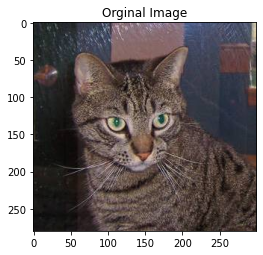

In [5]:
image = cv2.imread("/content/drive/MyDrive/Deep Learning For Computer Vision and NLP with Python/Colab Notebooks/OpenCV Morpological Analysis, Kernel, Gradient/cat.1.jpg")
catImageShow("Orginal Image",image)

In [6]:
def conv(image, kernel):
    imageH, imageW = image.shape[:2]
    kernelH, kernelW = kernel.shape[:2]
    
    padding = (kernelW-1) // 2
    
    image = cv2.copyMakeBorder(image, 
                              padding, padding,
                              padding, padding, 
                              cv2.BORDER_REFLECT)
    
    
    outputmask = np.zeros((imageH, imageW), dtype= "float32")
    
    
    for y in np.arange(padding, imageH+padding):
        for x in np.arange(padding, imageW+padding):
            # ROI --> Region if Interest
            roi = image[y - padding:y+padding+1, 
                       x - padding: x+padding+1]
            k = (roi*kernel).sum()
            outputmask[y-padding, x-padding] = k
            
            
    outputmask = rescale_intensity(outputmask, in_range = (0, 255))
    outputmask = (outputmask*255).astype("uint8")
    
    return outputmask

In [7]:
imageArgs = {"image":"/content/drive/MyDrive/Deep Learning For Computer Vision and NLP with Python/Colab Notebooks/OpenCV Morpological Analysis, Kernel, Gradient/cat.1.jpg"}

In [8]:
imageSmall = np.ones((7,7),dtype="float") * (1.0/(7*7))#np.ones(shape, dtype=None, order='C', *, like=None)
imageLarge = np.ones((21,21),dtype="float") * (1.0/(21*21))#np.ones(shape, dtype=None, order='C', *, like=None)

In [9]:
imageSmall

array([[0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816]])

In [10]:
imageLarge

array([[0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757],
       [0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757],
       [0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757],
       [0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.0022675

In [11]:
bottom_kernel = np.array([[-1, -2, -1], 
                         [0, 0, 0], 
                         [1, 2, 1]], dtype = "float")

In [12]:
custom_kernel = np.array([[-0.1, 0, 0], 
                         [0, 1, 0], 
                         [0, 0, 0]], dtype = "float")

In [13]:
emboss_kernel = np.array([[-2, -1, 0], 
                         [-1, 1, 1], 
                         [0, 1, 2]], dtype = "float")

In [14]:
sharpen_kernel = np.array([[0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]], dtype = "float")

In [15]:
identity_kernel = np.array([[0,0, 0], 
                         [0, 1, 0], 
                         [0, 0, 0]], dtype = "float")

In [16]:
left_kernel = np.array([[1,0, -1], 
                         [2, 0, -2], 
                         [1, 0, -1]], dtype = "float")

In [17]:
outline_kernel = np.array([[-1,-1,-1], 
                         [-1, 8, -1], 
                         [-1, -1, -1]], dtype = "float")

In [18]:
right_kernel = np.array([ [-1,0, 1], 
                         [-2, 0, 2], 
                         [-1, 0, 1]], dtype = "float")

In [19]:
top_kernel = np.array([[1, 2, 1], 
                      [0, 0, 0], 
                      [-1, -2, -1]], dtype = "float")

In [20]:
image  = cv2.imread(imageArgs["image"])
grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [21]:
print("Image information {}".format(image.shape))
print("\nImage information {}".format(grayimage.shape))

Image information (280, 300, 3)

Image information (280, 300)


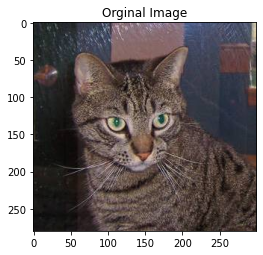

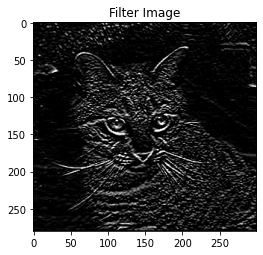

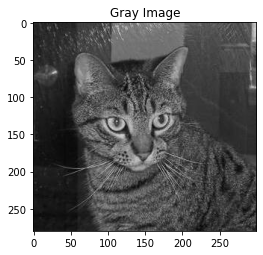

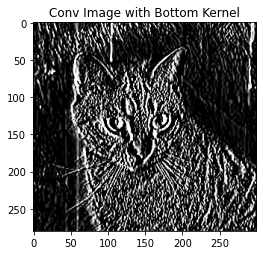

In [22]:
catImageShow("Orginal Image",image)
catImageShow("Filter Image",cv2.filter2D(grayimage,-1,bottom_kernel)) #filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None, /)
catImageShow("Gray Image",grayimage)
catImageShow("Conv Image with Bottom Kernel",conv(image,bottom_kernel))

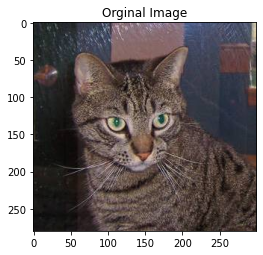

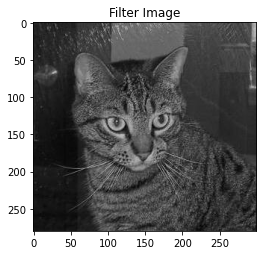

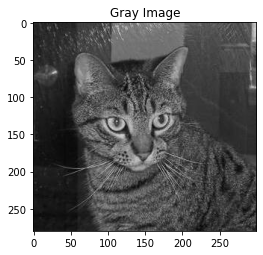

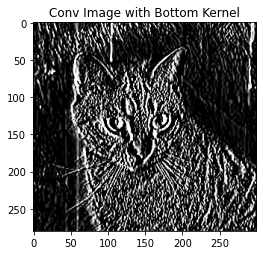

In [23]:
catImageShow("Orginal Image",image)
catImageShow("Filter Image",cv2.filter2D(grayimage,-1,custom_kernel)) #filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None, /)
catImageShow("Gray Image",grayimage)
catImageShow("Conv Image with Bottom Kernel",conv(image,bottom_kernel))

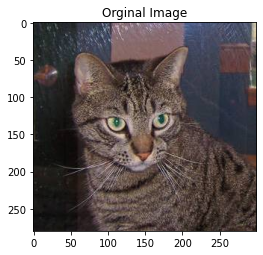

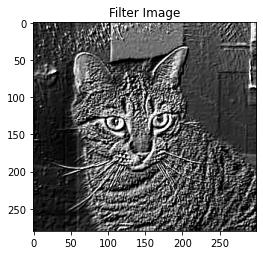

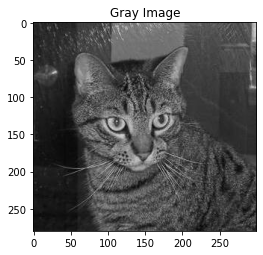

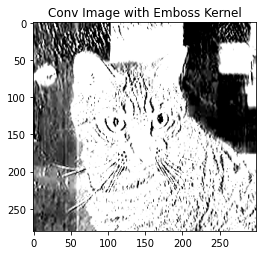

In [24]:
catImageShow("Orginal Image",image)
catImageShow("Filter Image",cv2.filter2D(grayimage,-1,emboss_kernel)) #filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None, /)
catImageShow("Gray Image",grayimage)
catImageShow("Conv Image with Emboss Kernel",conv(image,emboss_kernel))

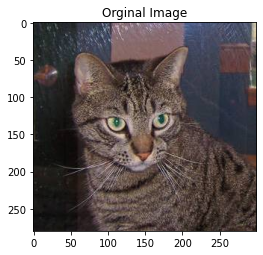

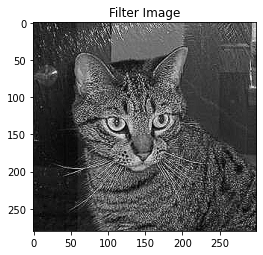

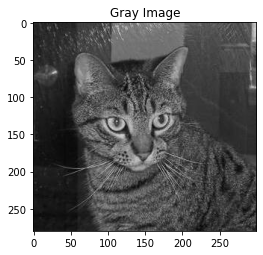

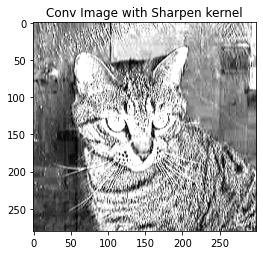

In [25]:
catImageShow("Orginal Image",image)
catImageShow("Filter Image",cv2.filter2D(grayimage,-1,sharpen_kernel)) #filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None, /)
catImageShow("Gray Image",grayimage)
catImageShow("Conv Image with Sharpen kernel",conv(image,sharpen_kernel))

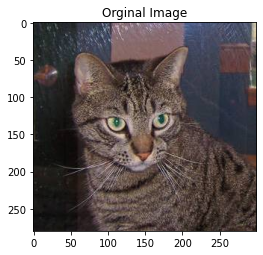

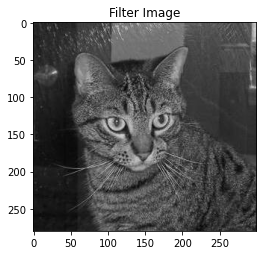

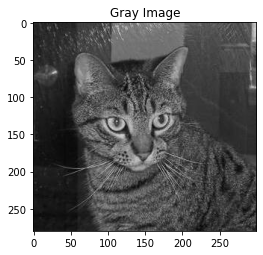

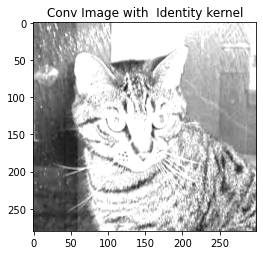

In [26]:
catImageShow("Orginal Image",image)
catImageShow("Filter Image",cv2.filter2D(grayimage,-1,identity_kernel)) #filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None, /)
catImageShow("Gray Image",grayimage) 
catImageShow("Conv Image with  Identity kernel",conv(image,identity_kernel))

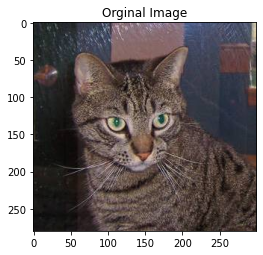

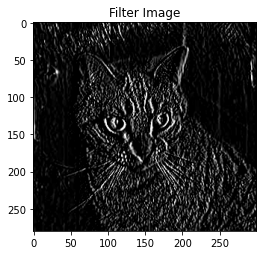

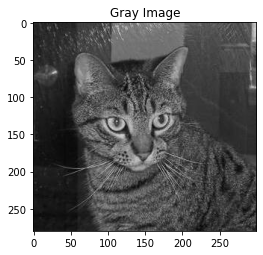

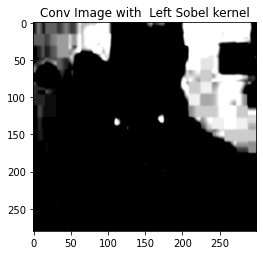

In [27]:
catImageShow("Orginal Image",image)
catImageShow("Filter Image",cv2.filter2D(grayimage,-1,left_kernel)) #filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None, /)
catImageShow("Gray Image",grayimage)
catImageShow("Conv Image with  Left Sobel kernel",conv(image,left_kernel))

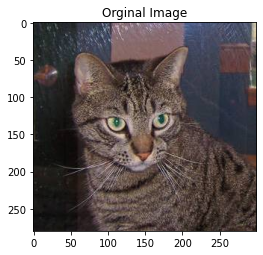

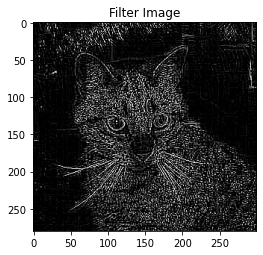

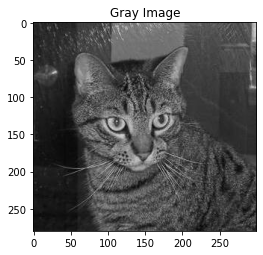

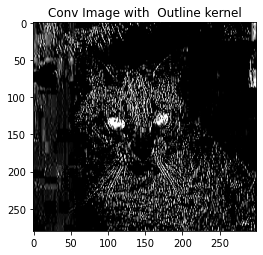

In [28]:
catImageShow("Orginal Image",image)
catImageShow("Filter Image",cv2.filter2D(grayimage,-1,outline_kernel)) #filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None, /)
catImageShow("Gray Image",grayimage)
catImageShow("Conv Image with  Outline kernel",conv(image,outline_kernel))

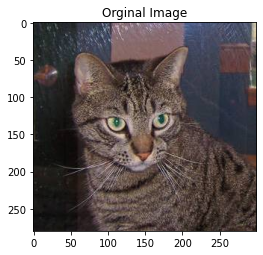

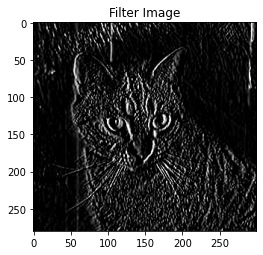

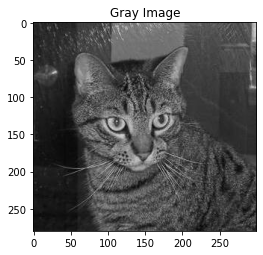

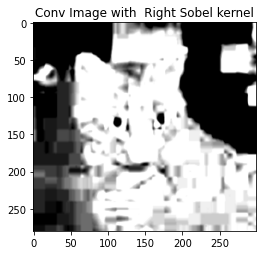

In [29]:
catImageShow("Orginal Image",image)
catImageShow("Filter Image",cv2.filter2D(grayimage,-1,right_kernel)) #filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None, /)
catImageShow("Gray Image",grayimage)
catImageShow("Conv Image with  Right Sobel kernel",conv(image,right_kernel))

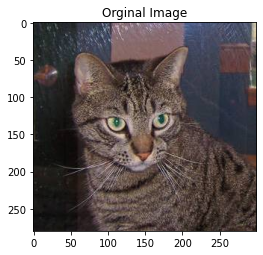

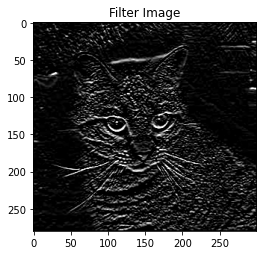

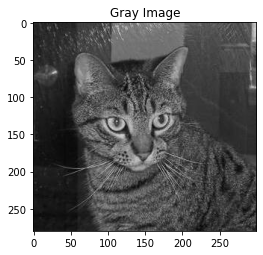

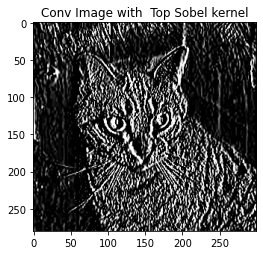

In [30]:
catImageShow("Orginal Image",image)
catImageShow("Filter Image",cv2.filter2D(grayimage,-1,top_kernel)) #filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None, /)
catImageShow("Gray Image",grayimage)
catImageShow("Conv Image with  Top Sobel kernel",conv(image,top_kernel))

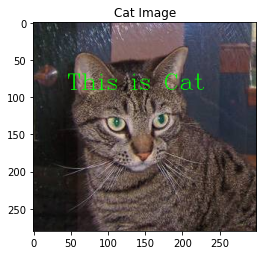

Text(0.5, 1.0, 'Image of Cat')

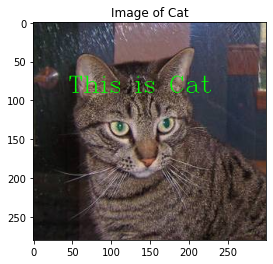

In [31]:
imageText = image.copy()
textonimage = "This is Cat"
imageCoor = (45, 90)
cv2.putText(imageText, textonimage, imageCoor, fontFace = cv2.FONT_HERSHEY_COMPLEX, 
           fontScale= 1.0,
           color = (0, 255, 0))#putText(img, text, org, fontFace, fontScale, color, thickness=None, lineType=None, bottomLeftOrigin=None, /)
catImageShow("Cat Image", imageText)
#cv2.waitKey(0)
#cv2.destroyWindow("Cat Image")

image = cv2.cvtColor(imageText, cv2.COLOR_BGR2RGB)
plt.subplot(111)
plt.imshow(image)
plt.title("Image of Cat")

Text(0.5, 1.0, 'Image of Cat')

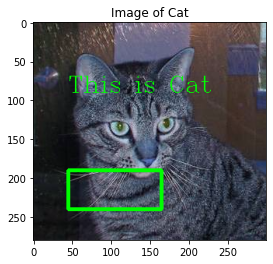

In [32]:
imageText = image.copy()
imageCoor1 = (45, 190)
imageCoor2 = (165,240)
cv2.rectangle(imageText, imageCoor1,imageCoor2,thickness = 3,color = (0, 255, 0))
image = cv2.cvtColor(imageText, cv2.COLOR_BGR2RGB)
plt.subplot(111)
plt.imshow(image)
plt.title("Image of Cat")

**Morphological Transformations**

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play. 

**Erosion**

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

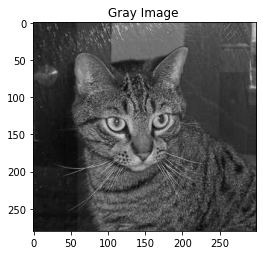

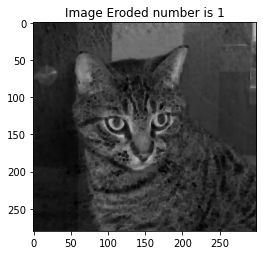

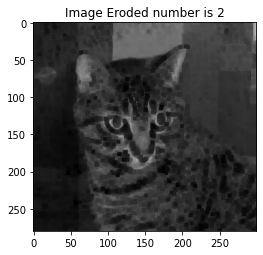

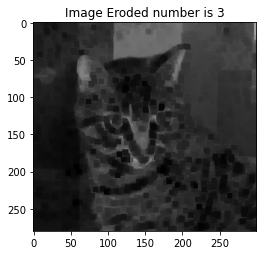

In [33]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #cvtColor(src, code, dst=None, dstCn=None, /) ->
catImageShow("Gray Image ",imageGray)

for i in range(0,3): #range(stop: int) range(start: int, stop: int, step: int=...)
    imageEroded = cv2.erode(imageGray,None,iterations = i+1)
    catImageShow("Image Eroded number is {}".format(i+1),imageEroded)

**Dilation**

It is just opposite of erosion. Here, a pixel element is '1' if at least one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

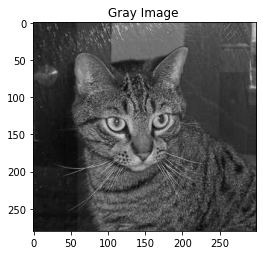

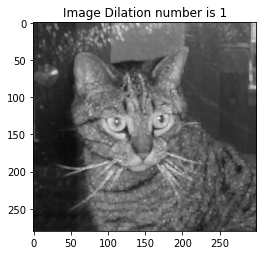

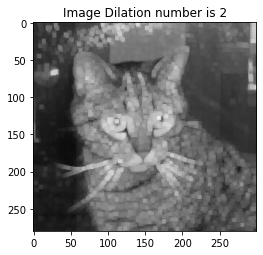

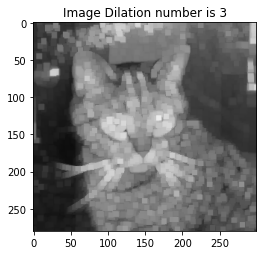

In [34]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #cvtColor(src, code, dst=None, dstCn=None, /) ->
catImageShow("Gray Image ",imageGray)

for i in range(0,3): #range(stop: int) range(start: int, stop: int, step: int=...)
    imageDilate = cv2.dilate(imageGray,None,iterations = i+1)#dilate(src, kernel, dst=None, anchor=None, iterations=None, borderType=None, borderValue=None, /) -> dst
    catImageShow("Image Dilation number is {}".format(i+1),imageDilate)

**Opening**

Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv.morphologyEx()

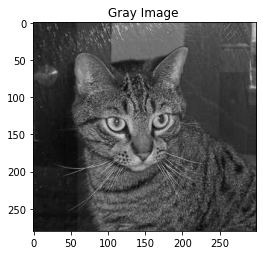

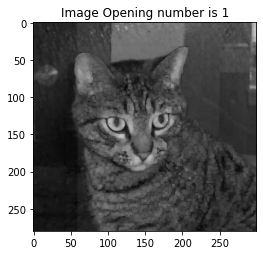

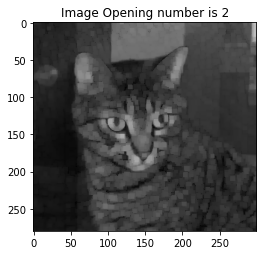

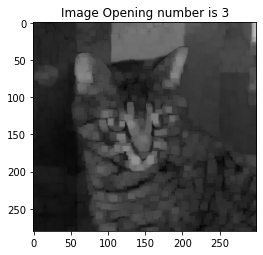

In [35]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #cvtColor(src, code, dst=None, dstCn=None, /) ->
catImageShow("Gray Image ",imageGray)

for i in range(0,3): #range(stop: int) range(start: int, stop: int, step: int=...)
    imageOpening = cv2.morphologyEx(imageGray,cv2.MORPH_OPEN,None,iterations = i+1)#morphologyEx(src, op, kernel, dst=None, anchor=None, iterations=None, borderType=None, borderValue=None, /) -> dst
    catImageShow("Image Opening number is {}".format(i+1),imageOpening)

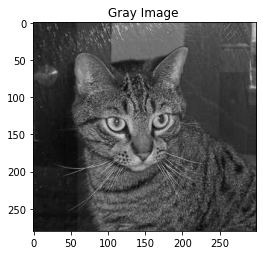

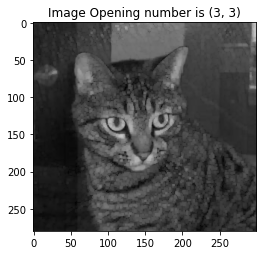

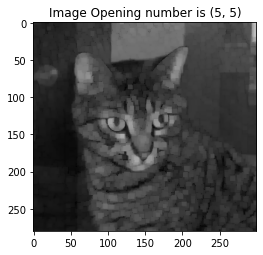

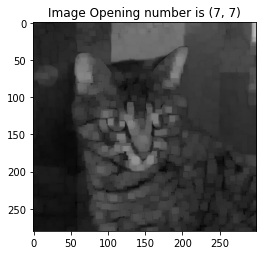

In [36]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #cvtColor(src, code, dst=None, dstCn=None, /) ->
catImageShow("Gray Image ",imageGray)
kernelSize = [(3,3),
             (5,5),
             (7,7)]

for i in kernelSize: #range(stop: int) range(start: int, stop: int, step: int=...)
    k = cv2.getStructuringElement(cv2.MORPH_RECT,i)
    imageOpening = cv2.morphologyEx(imageGray,cv2.MORPH_OPEN,k)#morphologyEx(src, op, kernel, dst=None, anchor=None, iterations=None, borderType=None, borderValue=None, /) -> dst
    catImageShow("Image Opening number is {}".format(i),imageOpening)

**Closing**

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

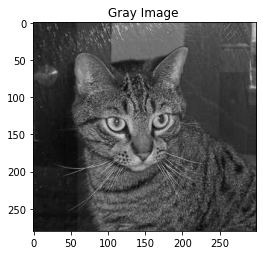

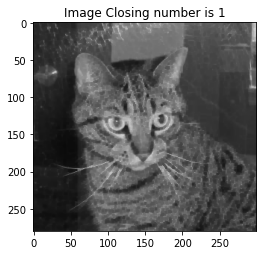

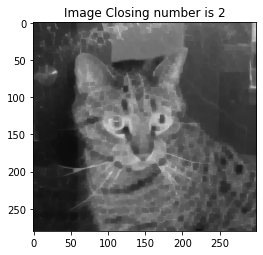

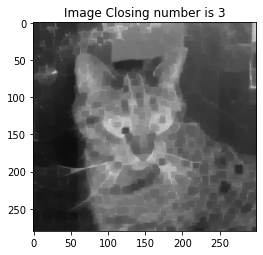

In [37]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #cvtColor(src, code, dst=None, dstCn=None, /) ->
catImageShow("Gray Image ",imageGray)

for i in range(0,3): #range(stop: int) range(start: int, stop: int, step: int=...)
    imageClosing = cv2.morphologyEx(imageGray,cv2.MORPH_CLOSE,None,iterations = i+1)#morphologyEx(src, op, kernel, dst=None, anchor=None, iterations=None, borderType=None, borderValue=None, /) -> dst
    catImageShow("Image Closing number is {}".format(i+1),imageClosing)

**Morphological Gradient**

It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.

> gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

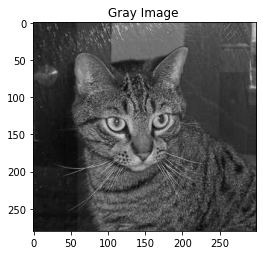

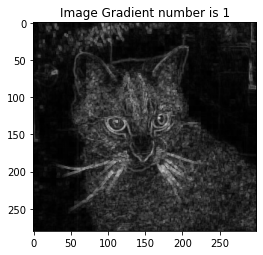

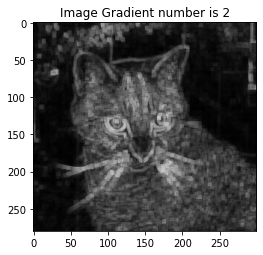

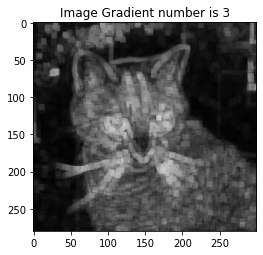

In [38]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #cvtColor(src, code, dst=None, dstCn=None, /) ->
catImageShow("Gray Image ",imageGray)

for i in range(0,3): #range(stop: int) range(start: int, stop: int, step: int=...)
    imageGradient = cv2.morphologyEx(imageGray,cv2.MORPH_GRADIENT,None,iterations = i+1)#morphologyEx(src, op, kernel, dst=None, anchor=None, iterations=None, borderType=None, borderValue=None, /) -> dst
    catImageShow("Image Gradient number is {}".format(i+1),imageGradient)

**Top Hat**

It is the difference between input image and Opening of the image. Below example is done for a 9x9 kernel.

*tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)*

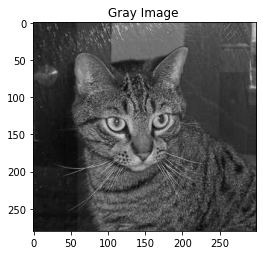

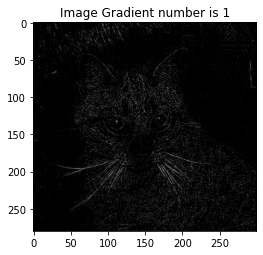

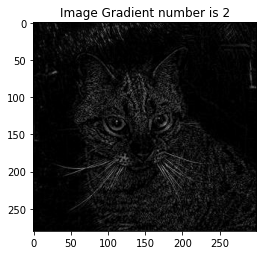

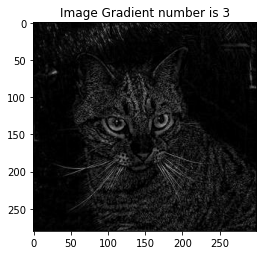

In [39]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #cvtColor(src, code, dst=None, dstCn=None, /) ->
catImageShow("Gray Image ",imageGray)

for i in range(0,3): #range(stop: int) range(start: int, stop: int, step: int=...)
    imageTopHat = cv2.morphologyEx(imageGray,cv2.MORPH_TOPHAT,None,iterations = i+1)#morphologyEx(src, op, kernel, dst=None, anchor=None, iterations=None, borderType=None, borderValue=None, /) -> dst
    catImageShow("Image Gradient number is {}".format(i+1),imageTopHat)

**Black Hat**

It is the difference between the closing of the input image and input image.

*blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)*

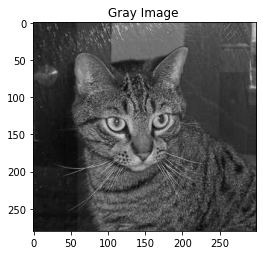

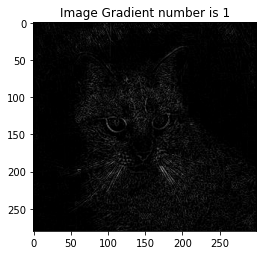

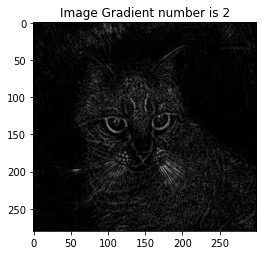

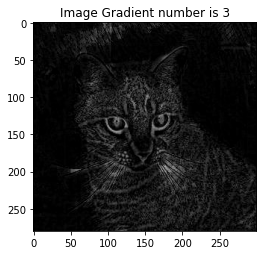

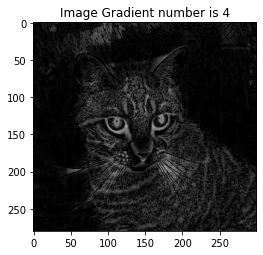

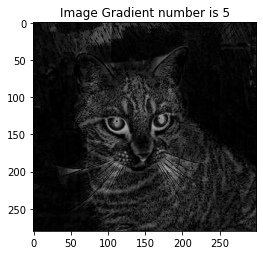

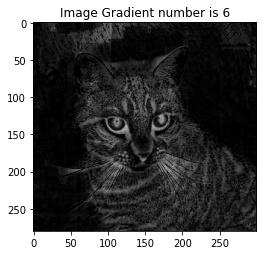

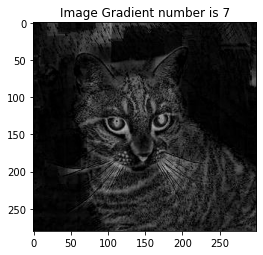

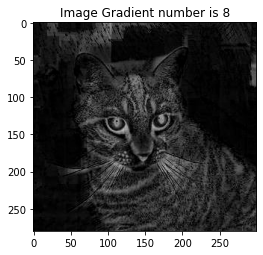

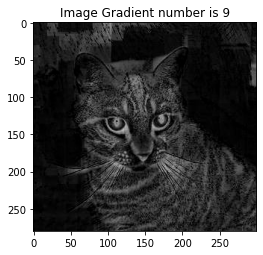

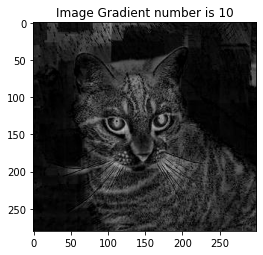

In [40]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #cvtColor(src, code, dst=None, dstCn=None, /) ->
catImageShow("Gray Image ",imageGray)

for i in range(0,10): #range(stop: int) range(start: int, stop: int, step: int=...)
    imageBlackHat = cv2.morphologyEx(imageGray,cv2.MORPH_BLACKHAT,None,iterations = i+1)#morphologyEx(src, op, kernel, dst=None, anchor=None, iterations=None, borderType=None, borderValue=None, /) -> dst
    catImageShow("Image Gradient number is {}".format(i+1),imageBlackHat)

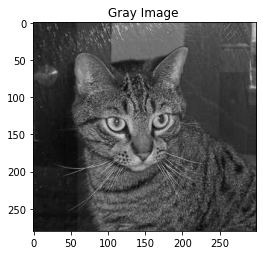

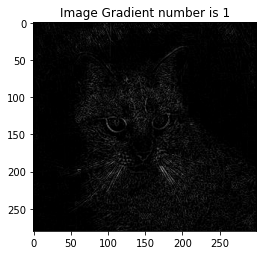

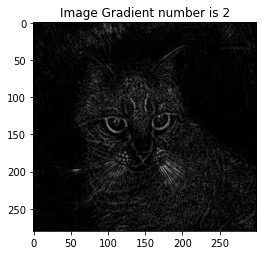

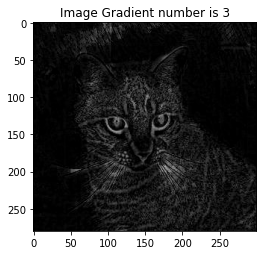

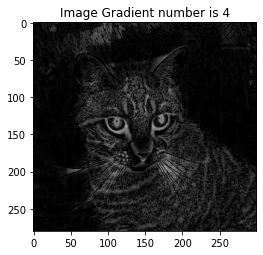

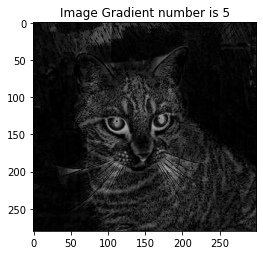

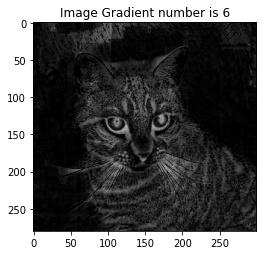

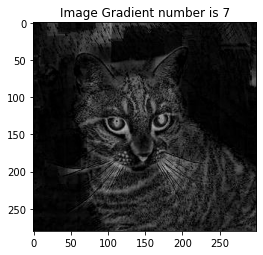

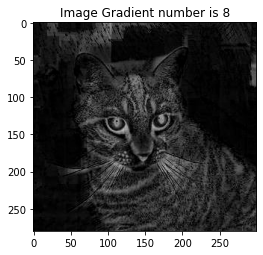

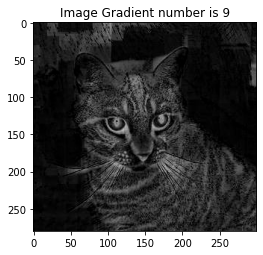

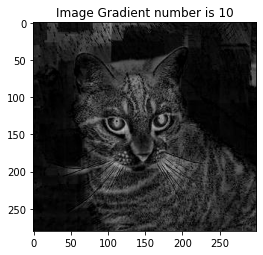

In [41]:
image=  cv2.imread(imageArgs["image"])
# imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #cvtColor(src, code, dst=None, dstCn=None, /) ->
catImageShow("Gray Image ",imageGray)

for i in range(0,10): #range(stop: int) range(start: int, stop: int, step: int=...)
    imageBlackHat = cv2.morphologyEx(imageGray,cv2.MORPH_BLACKHAT,None,iterations = i+1)#morphologyEx(src, op, kernel, dst=None, anchor=None, iterations=None, borderType=None, borderValue=None, /) -> dst
    catImageShow("Image Gradient number is {}".format(i+1),imageBlackHat)

In [42]:
import cv2
import mediapipe as mp

webcam=cv2.VideoCapture(0)
mp_face=mp.solutions.face_mesh
mp_drawing=mp.solutions.drawing_utils
with mp_face.FaceMesh(min_detection_confidence=0.5,min_tracking_confidence=0.5) as face_mesh:
    while True:
        control,frame=webcam.read()
        if control==False:
            break
        rgb=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        result=face_mesh.process(rgb)
        if result.multi_face_landmarks:
            for face_landmarks in result.multi_face_landmarks:
                mp_drawing.draw_landmarks(frame,face_landmarks,mp_face.FACEMESH_TESSELATION)
        cv2.imshow("Test",frame)
        if cv2.waitKey(10)==27:
            break

In [43]:
import mediapipe as mp
import cv2

handModel=mp.solutions.hands
handModelDrawing=mp.solutions.drawing_utils
webcam=cv2.VideoCapture(0)

with handModel.Hands(min_detection_confidence=0.5,min_tracking_confidence=0.5) as hands:
    while True:
        control,frame=webcam.read()
        if control==False:
            break
        rgb=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        result=hands.process(rgb)
        if result.multi_hand_landmarks:
            for handLandmark in result.multi_hand_landmarks:
                handModelDrawing.draw_landmarks(frame,handLandmark,handModel.HAND_CONNECTIONS)
        cv2.imshow("Hands",frame)
        if cv2.waitKey(10)==27:
            break